In [11]:
# import libraries
import numpy as np
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc
from sklearn import metrics


import matplotlib.pyplot as plt

In [2]:
# read the dataset
data = pd.read_csv("clean_hotel_bookings.csv", index_col='Unnamed: 0')

/Users/moniquekong/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# look at the correlations with is_canceled
data.corr()['is_canceled'].sort_values()

deposit_type_No Deposit              -0.477911
total_of_special_requests_minmax     -0.234658
required_car_parking_spaces_minmax   -0.195498
market_segment_Direct                -0.154390
distribution_channel_Direct          -0.151620
customer_type_Transient-Party        -0.124135
country_is_FRA                       -0.118254
country_is_DEU                       -0.107316
agent_7                              -0.085588
is_repeated_guest                    -0.084793
market_segment_Corporate             -0.081667
distribution_channel_Corporate       -0.075428
agent_14                             -0.070246
market_segment_Complementary         -0.039306
customer_type_Group                  -0.038698
winter                               -0.037611
babies_minmax                        -0.032491
market_segment_Offline TA/TO         -0.028472
meal_Undefined                       -0.025896
customer_type_Contract               -0.023670
meal_HB                              -0.019845
distribution_

In [4]:
features = [
            'hotel',
            'is_repeated_guest',
#             'reserved_room_type',
#             'assigned_room_type',
            'reserved_assigned_room_type_match',
            'country_is_FRA',
            'country_is_DEU',
            'country_is_other',
            'spring',
            'summer',
            'fall',
            'winter',
            'distribution_channel_Corporate',
            'distribution_channel_Direct',
            'distribution_channel_GDS',
            'distribution_channel_TA/TO',
            'distribution_channel_Undefined',
            'market_segment_Aviation',
            'market_segment_Complementary',
            'market_segment_Corporate',
            'market_segment_Direct',
            'market_segment_Groups',
            'market_segment_Offline TA/TO',
            'market_segment_Online TA',
            'market_segment_Undefined',
            'meal_BB',
            'meal_FB',
            'meal_HB',
            'meal_SC',
            'meal_Undefined',
            'deposit_type_No Deposit',
            'deposit_type_Non Refund',
            'customer_type_Contract',
            'customer_type_Group',
            'customer_type_Transient',
            'customer_type_Transient-Party',
            'agent_14',
            'agent_7',
            'agent_is_other',
            'log_lead_minmax',
#             'cut_previous_cancellations',
#             'cut_previous_bookings_not_canceled',
#             'cut_booking_changes',
            'stays_in_weekend_nights_minmax',
            'stays_in_week_nights_minmax',
            'stays_in_total_nights_minmax',
            'adults_minmax',
            'children_minmax',
            'babies_minmax',
            'days_in_waiting_list_minmax',
            'adr_minmax',
            'required_car_parking_spaces_minmax',
            'total_of_special_requests_minmax'
           ]

label = ['is_canceled']

In [5]:
len(features)

48

In [6]:
X = data[features]
y = data[label]

In [8]:
# features selection - reduce half of the features 
lr = LogisticRegression(penalty='l1', C=0.5, random_state=4, solver='saga', max_iter=1000)

rfe = RFE(lr)
rfe = rfe.fit(X, y.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True  True False False False  True False  True
  True False  True False  True  True False  True  True  True False False
  True False False  True False  True False False  True False False  True
  True  True False False False  True  True False False  True  True  True]
[12  9  1 18  1  1  5  4 13  1 20  1  1  8  1 16  1  1 19  1  1  1 23 25
  1  7 11  1 24  1 15  2  1  6 22  1  1  1 14  3 21  1  1 17 10  1  1  1]


In [10]:
features_selected = []
for feature, is_selected in zip(features,rfe.support_):
    if is_selected:
        features_selected.append(feature)
print(features_selected)

['reserved_assigned_room_type_match', 'country_is_DEU', 'country_is_other', 'winter', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_Undefined', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'meal_FB', 'meal_Undefined', 'deposit_type_Non Refund', 'customer_type_Transient', 'agent_7', 'agent_is_other', 'log_lead_minmax', 'adults_minmax', 'children_minmax', 'adr_minmax', 'required_car_parking_spaces_minmax', 'total_of_special_requests_minmax']


In [12]:
X_new = data[features_selected]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)

In [15]:
lr.fit(X_train, y_train)

/Users/moniquekong/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=4, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
coeff_df = pd.DataFrame(lr.coef_.flatten(), X_new.columns, columns=['Coefficient'])  

In [19]:
coeff_df

,Coefficient
reserved_assigned_room_type_match,1.827514
country_is_DEU,-0.365048
country_is_other,0.867323
winter,0.274388
distribution_channel_Direct,-0.526026
distribution_channel_GDS,-0.855719
distribution_channel_Undefined,2.821671
market_segment_Complementary,0.477856
market_segment_Corporate,-0.468391
market_segment_Groups,-0.247470


In [27]:
y_act = y.values.ravel()

In [28]:
score_cv = cross_val_score(lr, X_new, y_act, cv=10)

In [29]:
score_cv.mean()

0.7793113080044067

In [30]:
y_pred = cross_val_predict(lr, X, y_act, cv=10)

In [31]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_act, y_pred))
print("Accuracy:",accuracy_score(y_act, y_pred))

Confusion Matrix:
 [[63831 11335]
 [20069 24155]]
Accuracy: 0.7369628947148003


In [32]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80     75166
           1       0.68      0.55      0.61     44224

    accuracy                           0.74    119390
   macro avg       0.72      0.70      0.70    119390
weighted avg       0.73      0.74      0.73    119390



**ROC**

In [33]:
# probablities for each prediction
proba_y = cross_val_predict(lr, X, y_act, cv=10, method='predict_proba')

In [34]:
# lower threshold for '0' to be 0.4
proba_y_0_lt= [0 if i >= 0.4 else 1 for i in proba_y[:,0]]

In [46]:
print("Confusion Matrix:", "\n"+str(confusion_matrix(y_act,proba_y_0_lt))+"\n")
print("Accuracy Score:", "\n"+str(accuracy_score(y_act,proba_y_0_lt,normalize=True, sample_weight=None))+"\n")
print(classification_report(y_act,proba_y_0_lt))

Confusion Matrix: 
[[68961  6205]
 [24123 20101]]

Accuracy Score: 
0.7459753748220119

              precision    recall  f1-score   support

           0       0.74      0.92      0.82     75166
           1       0.76      0.45      0.57     44224

    accuracy                           0.75    119390
   macro avg       0.75      0.69      0.69    119390
weighted avg       0.75      0.75      0.73    119390



In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0.5, 0, 'False Positive Rate')

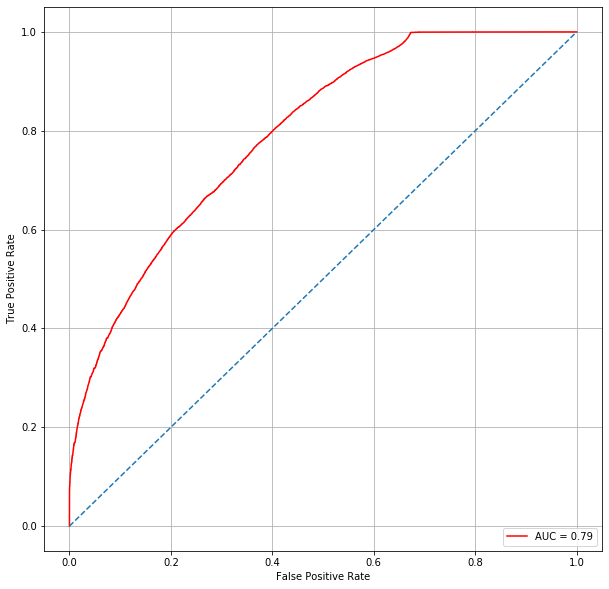

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_act,proba_y[:,0],pos_label=0)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [40]:
metrics.auc(fpr, tpr)

0.7945235717461031